Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [4]:
def hire_assistant(applicants):
    #setting the value of the best to be the lowest possible value
    best = float('-inf')
    #setting the count
    hire_count = 0
    #going through the applicants list and comparing each number to the previous best
    for i in applicants:
        if i > best:
            hire_count+=1
            #updating the previous best if the equation is true
            best = i
    return hire_count



In [5]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [176]:
import random
def experimental_hires(N):
    #generating a random list of applicants
    apps = [random.randrange(1, 11, 1) for i in range(N)]
    best = float('-inf')
    hire_count = 0
    for i in range(0, len(apps)):
        #getting a random indext
        A = random.randrange(len(apps))
        #comparing a random applicant to the previous best
        if apps[A] > best:
            hire_count+=1
            best = apps[A]
        #deleting the applicant we comapred from the list
        apps.pop(A)
    return hire_count
 
#simulating the function 10 times
results = []
for l in range(10):
    results.append(experimental_hires(0))
    
print(sum(results)/len(results))

0.0


## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [52]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

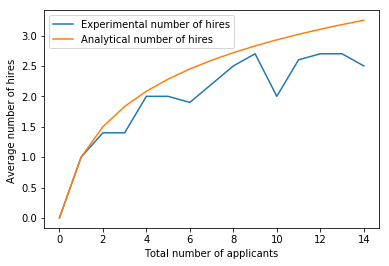

In [170]:
import matplotlib.pyplot as plt
def graph(N):
    #x axis
    x =  list(range(N))
    #creating empty variables to collect the values for both experimental and analytical functions
    #in both cases we are iterating through the applicants and finding the average number of hires 
    exp = []
    for l in range(N):
        results = []
        #for the experimental we need to run it many times and find the average
        for k in range(10):
            results.append(experimental_hires(l))
        exp.append(sum(results)/len(results))
        #for the analytical no need to do it because it already predicts the average
    analyt = []
    for l in range(N):
        analyt.append(analytical_hires(l))
        
    #plotting the data
    plt.plot(x, exp, label='Experimental number of hires')
    plt.plot(x, analyt, label='Analytical number of hires')
    plt.xlabel("Total number of applicants")
    plt.ylabel("Average number of hires ")
    plt.legend(loc="upper left")
    
graph(15)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

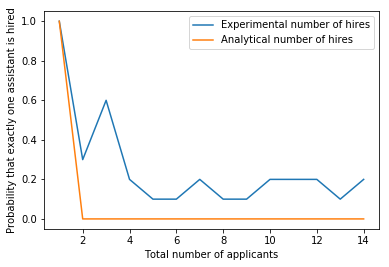

In [171]:
#the same process as in the previous question - in this case we are finding how many times the result is 1 and divide it by the number of applicants
def graph2(N):
    x =  list(range(1,N))
    exp = []
    for l in range(1,N):
        results1 = []
        for k in range(10):
            if experimental_hires(l) == 1:
                results1.append(1)
        exp.append(sum(results1)/10)
    
    analyt = []
    for l in range(1,N):
        results2 = []
        for k in range(10):
            if analytical_hires(l) == 1:
                results2.append(1)
        analyt.append(sum(results2)/10)
        
    plt.plot(x, exp, label='Experimental number of hires')
    plt.plot(x, analyt, label='Analytical number of hires')
    plt.xlabel("Total number of applicants")
    plt.ylabel("Probability that exactly one assistant is hired")
    plt.legend(loc="upper right")
    
graph2(15)

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

I think that yes, because in the the hiring assistant problem, we had a sample of applicants and there are n! combiantions in which we invite the applicants for an interview. In the same manner, there are n! combinations in which the guests will come to pick up their hats.

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

I would use Command 2, because the first command can return the same integer twice whereas the third command returns floats. The shuffle function does what we need - creates a random sequence of numbers in the range which could represents the sequence in which the guests come to pick up their hats.

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [150]:
import numpy as np
def hat_check(N):
    hat_list = list(range(N)) 
    np.random.shuffle(hat_list) 
    count = 0
    #generating a random index and comparing it to a number from the hat_list for every element in the hat_list
    for i in range(N):
        A = random.randrange(N)
        if hat_list[i] == hat_list[A]:
            #updating the count if the equation is true (if the attendant guessed correctly)
            count += 1
    return count

hat_check(15)

0

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

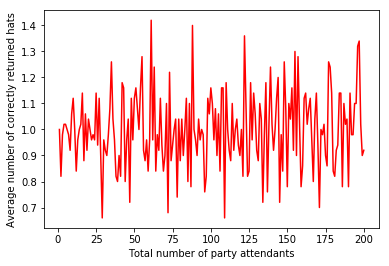

In [174]:
def graph3(N):
    x = list(range(1,N))
    
    correct = []
    #here we are simulating the previous function 50 times for every number of guests from 1 to N-1
    for l in range(1,N):
        results = []
        for k in range(50):
            results.append(hat_check(l))
        correct.append(sum(results)/len(results))
    
    #plotting the data
    plt.plot(x, correct, label='Average number of correctly returned hats', color='red')
    plt.xlabel("Total number of party attendants")
    plt.ylabel("Average number of correctly returned hats")

graph3(201)

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE